# Fake news detection using ML 
####  By: Madireddy Bharath Kumar Reddy - 12107901

In [2]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer # For text preprocessing and feature extraction
from sklearn.feature_extraction.text import TfidfTransformer # For text preprocessing and feature extraction
from sklearn import feature_extraction, linear_model, model_selection, preprocessing # For machine learning algorithms and data preprocessing
from sklearn.metrics import accuracy_score  # For evaluating model performance
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing sets
from sklearn.pipeline import Pipeline # For chaining multiple transformers and estimators into a single pipeline

## Read datasets

In [3]:
# Reading the fake and true news datasets into pandas DataFrames
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
# Checking the shape of the fake news dataset to understand its dimensions
fake.shape

(23481, 4)

In [5]:
# Checking the shape of the true news dataset to understand its dimensions
true.shape

(21417, 4)

## Data cleaning and preparation

In [6]:
# Adding a 'target' column to both datasets to distinguish between fake and true news
fake['target'] = 'fake' #'fake' label to the fake news dataset
true['target'] = 'true' #'true' label to the true news dataset

In [7]:
# Concatenating the fake and true news datasets into a single DataFrame
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

### Shuffling the combined dataset to randomize the order of the rows
### 'shuffle': A function from sklearn.utils used to shuffle the rows of the DataFrame, which helps in randomizing the order of the data for better generalization during model training.

In [8]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [9]:
# Check the data
data.head()

,title,text,subject,date,target
0,"Venezuela says debt refinancing under way, S&P...",CARACAS/NEW YORK (Reuters) - Venezuela s cash-...,worldnews,"November 14, 2017",true
1,Trump says he'll submit healthcare reforms in ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 16, 2017",true
2,Tension in South Sudan capital after bid to di...,NAIROBI (Reuters) - South Sudan s government h...,worldnews,"November 4, 2017",true
3,Early 2018 is crunch time for banks' Brexit de...,LONDON (Reuters) - Many international banks an...,worldnews,"October 11, 2017",true
4,‘Alt-Right’ White House Reporter Gets Fooled ...,When Donald Trump allowed popular Nazi blog Th...,News,"November 2, 2017",fake


In [10]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"Venezuela says debt refinancing under way, S&P...",CARACAS/NEW YORK (Reuters) - Venezuela s cash-...,worldnews,true
1,Trump says he'll submit healthcare reforms in ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,true
2,Tension in South Sudan capital after bid to di...,NAIROBI (Reuters) - South Sudan s government h...,worldnews,true
3,Early 2018 is crunch time for banks' Brexit de...,LONDON (Reuters) - Many international banks an...,worldnews,true
4,‘Alt-Right’ White House Reporter Gets Fooled ...,When Donald Trump allowed popular Nazi blog Th...,News,fake


In [11]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,CARACAS/NEW YORK (Reuters) - Venezuela s cash-...,worldnews,true
1,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,true
2,NAIROBI (Reuters) - South Sudan s government h...,worldnews,true
3,LONDON (Reuters) - Many international banks an...,worldnews,true
4,When Donald Trump allowed popular Nazi blog Th...,News,fake


#### In the context of fake news detection, the relevance of the 'date' and 'title' columns can vary based on the specific features you want to use for the analysis and the assumptions made about what characteristics are indicative of fake news. Here are some reasons why 'date' and 'title' might be considered less relevant for fake news detection:
### A.Reasons for removing date:
##### 1.Temporal Bias:
##### If the dataset contains a wide range of dates, the model might learn to predict based on the time the news was published rather than the content itself. This could introduce a bias that is not applicable to new data.
##### 2.Irrelevant to Content:
##### The content of the news article (the 'text' column) is more directly related to the prediction of fake news than the date it was published.
### B.Resons for removing title:
##### 1.Short and Not Representative:
##### News titles are typically short and may not contain enough information to accurately determine the authenticity of the news. The main body of the news (the 'text' column) is more informative and relevant for analysis.
##### 2.Duplication of Information:
##### The information in the title may be redundant with the information in the 'text' column, making it less useful for distinguishing between fake and real news.
##### However, it's important to note that the removal of these columns is based on assumptions and the specific focus of the analysis. In some cases, the 'title' and 'date' columns could contain valuable information for the fake news detection task.But in this case there is no use of using them.

In [12]:
#Convert to lowercase
#To standardize the text data and avoid any inconsistencies in the text case during the analysis and modeling process.
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,caracas/new york (reuters) - venezuela s cash-...,worldnews,true
1,washington (reuters) - president donald trump ...,politicsNews,true
2,nairobi (reuters) - south sudan s government h...,worldnews,true
3,london (reuters) - many international banks an...,worldnews,true
4,when donald trump allowed popular nazi blog th...,News,fake


In [13]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

#### Removing punctuation is useful in text preprocessing
#### 'string': A Python module containing a collection of string constants and a class for string operations.
#### 'punctuation_removal': A custom function defined to remove punctuation from the text using a list comprehension.
#### '.apply(punctuation_removal)': A pandas DataFrame method used to apply the punctuation_removal function to each row in the 'text' column to remove punctuation.
#### This preprocessing step helps in cleaning and preparing the text data for further analysis and modeling, making the text data more suitable for text classification tasks like fake news detection.

In [14]:
# Check
data.head()

,text,subject,target
0,caracasnew york reuters venezuela s cashstrap...,worldnews,true
1,washington reuters president donald trump sai...,politicsNews,true
2,nairobi reuters south sudan s government has ...,worldnews,true
3,london reuters many international banks and f...,worldnews,true
4,when donald trump allowed popular nazi blog th...,News,fake


In [15]:
# Removing stopwords
import nltk # Importing the Natural Language Toolkit library
nltk.download('stopwords') # Downloading the stopwords corpus
from nltk.corpus import stopwords # Importing the stopwords corpus
stop = stopwords.words('english') # Getting the list of English stopwords
# Applying the stopwords removal to the 'text' column
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\BHARATH KUMAR
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
### Stopwords are commonly used words in a language that are often filtered out before or after processing of natural language data. These words are typically removed from text data because they don't carry significant meaning and are frequently used across different documents or sentences. 

### Removing stopwords is an essential text preprocessing step as it eliminates common words that do not contribute much to the meaning of the text, making the text data more focused and suitable for text classification tasks like fake news detection. 
### Some examples of stopwords are 'that', 'these', 'those', 'am',  'is', 'are', 'was', 'were', 'be', 'been' etc.These words are commonly used in English text but do not contribute much to the meaning of the text when performing text analysis tasks like fake news detection. Removing stopwords helps in focusing on the more significant words that carry the actual meaning and context in the text.

In [16]:
data.head()

,text,subject,target
0,caracasnew york reuters venezuela cashstrapped...,worldnews,true
1,washington reuters president donald trump said...,politicsNews,true
2,nairobi reuters south sudan government sought ...,worldnews,true
3,london reuters many international banks financ...,worldnews,true
4,donald trump allowed popular nazi blog gateway...,News,fake


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


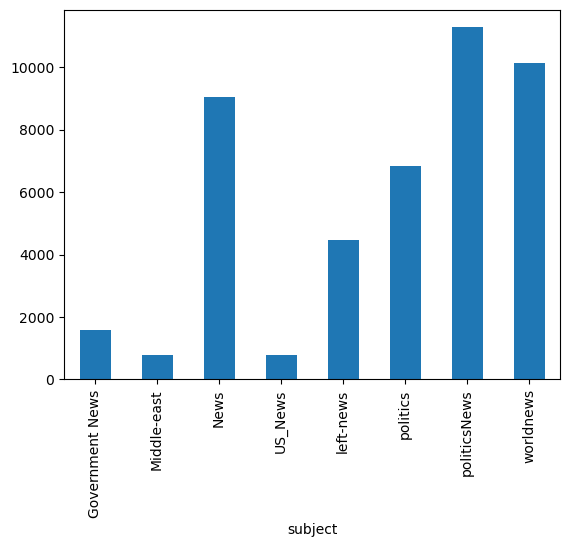

In [17]:
# Basic data exploration to check the number of articles per subject i.e., How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


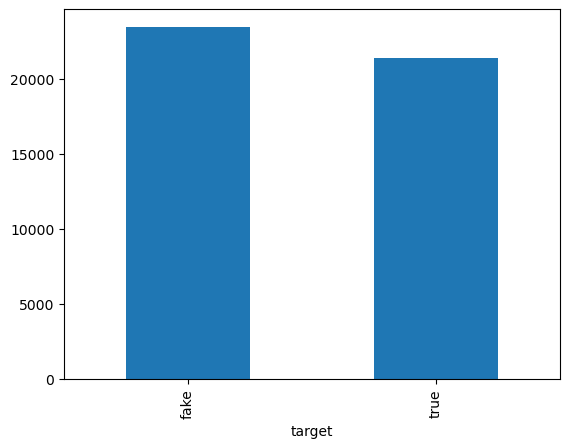

In [18]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
#!pip install wordcloud


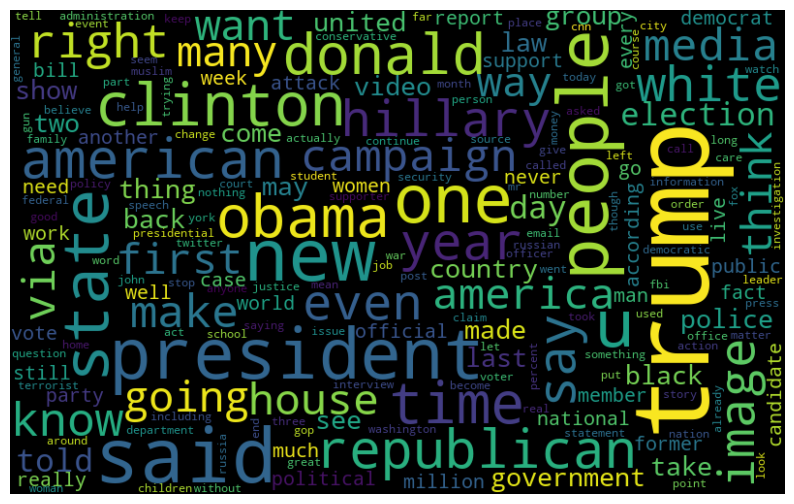

In [20]:
# Word cloud for fake news
from wordcloud import WordCloud

# Filtering the fake news data
fake_data = data[data["target"] == "fake"]

# Joining all the text from the fake news articles
all_words = ' '.join([text for text in fake_data.text])
# Creating the WordCloud object
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

# Plotting the WordCloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

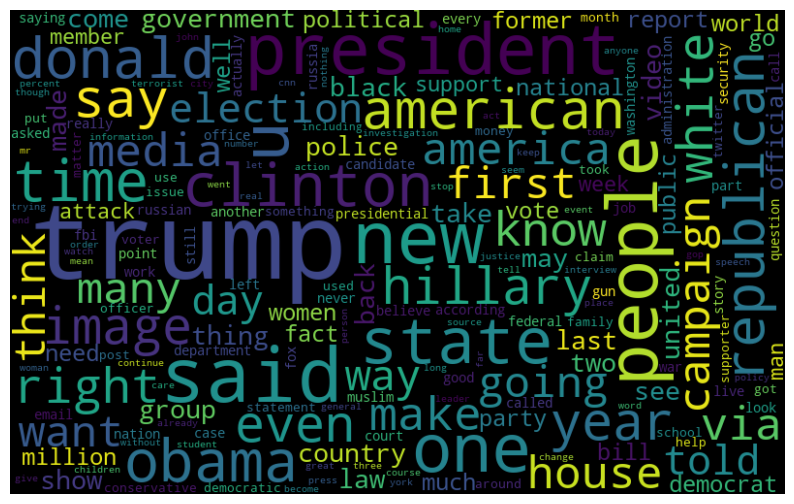

In [21]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### A WordCloud is a visual representation of text data, where the size of each word indicates its frequency or importance in the text. In the context of fake news detection, a WordCloud can be useful for several reasons:
### 1.Visualization of Most Frequent Words:
#### The WordCloud provides a visual summary of the most frequently occurring words in both fake and true news articles. This can help in quickly identifying common themes, topics, or keywords associated with fake news.
### 2.Insight into the Content
#### By examining the WordCloud, one can gain insights into the topics and language patterns commonly used in both fake and true news articles. This understanding can be valuable for feature engineering and model training.
### 3.Data Exploration and Understanding
#### WordClouds can be used as an exploratory tool to understand the dataset and guide the preprocessing steps. It can help in identifying potential stopwords or irrelevant words that may need to be removed during text preprocessing.
### The WordCloud visualization provides a quick and intuitive way to explore and understand the text data, especially in the context of fake news detection, where identifying common themes and keywords is crucial for developing effective classification models.

In [22]:
# Most frequent words counter 
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                 "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12,8))
    sns.set(style="whitegrid")
    ax = sns.barplot(data=df_frequency, x="Frequency", y="Word", palette="Blues_r")
    ax.set(xlabel="Frequency", ylabel="Word")
    plt.title(f"Top {quantity} Most Frequent Words in {column_text}")
    plt.show()



##### 'token_space = tokenize.WhitespaceTokenizer()': Initializes a whitespace tokenizer from the nltk library.
### The WhitespaceTokenizer from the nltk library is a simple tokenizer that splits a string into tokens based on whitespace characters (spaces, tabs, and newlines).
##### 'all_words = ' '.join([text for text in text[column_text]])': Joins all the text from the specified column into a single string.
##### 'token_phrase = token_space.tokenize(all_words)': Tokenizes the joined text into individual words using the whitespace tokenizer.
##### 'frequency = nltk.FreqDist(token_phrase)': Calculates the frequency distribution of the words.
### The FreqDist class from the nltk library is used to compute the frequency distribution of the sample data. It provides a convenient way to get the frequency of each unique element in the dataset.
##### 'df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})': Converts the frequency distribution into a DataFrame.
##### 'df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)': Selects the top quantity most frequent words.
##### 's.barplot()' Creates a bar plot using seaborn to visualize the most frequent words.
##### plt.xticks(rotation='vertical'): Rotates the x-axis labels to make them vertical for better readability.

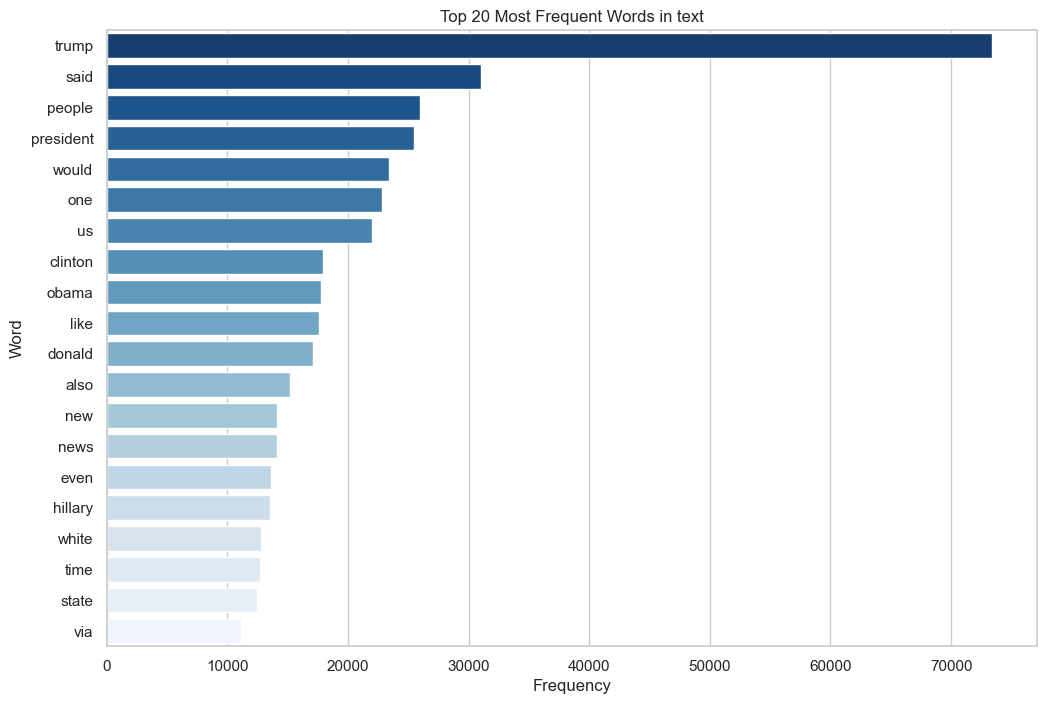

In [23]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

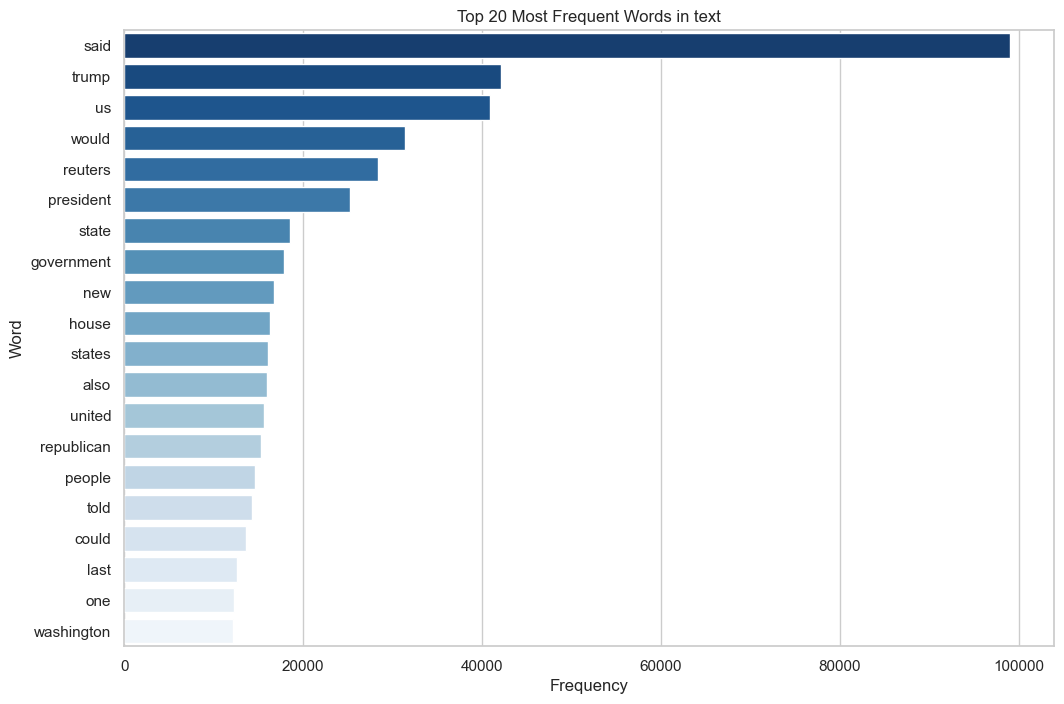

In [24]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Purpose of the Most Frequent Words Counter:
#### The purpose of this code is to identify and visualize the most frequent words in both fake and true news articles. This can provide insights into the common words and themes associated with fake news, which can be helpful for understanding the characteristics of fake news articles and for feature extraction in machine learning models.

## Modeling

### Peparing the data

In [25]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# **Naive Bayes**




In [36]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 95.28%


### MultinomialNB: Multinomial Naive Bayes classifier.
#### Pipeline:Combines multiple steps for text classification.
### A Pipeline in scikit-learn is a tool to simplify the process of building and deploying machine learning workflows. It combines a sequence of transformations and a final estimator (model) into a single object. This can be particularly useful when there are multiple steps in the machine learning process, such as data preprocessing, feature extraction, and model training.
#### CountVectorizer: Converts text data into a matrix of token counts.
### CountVectorizer is a text preprocessing step that converts a collection of text documents into a matrix of token counts. Each row in the matrix represents a document, and each column represents a unique word in the corpus. The value at each cell indicates the frequency of a word in a document.
#### TfidfTransformer: Transforms the count matrix to a normalized tf-idf representation.
### TfidfTransformer transforms a count matrix (obtained from CountVectorizer) into a normalized tf-idf (Term Frequency-Inverse Document Frequency) representation. It considers the importance of a word in a document relative to its frequency across all documents in the corpus.

### Accuracy is one of the most straightforward metrics used to evaluate the performance of a classification model. It measures the proportion of correctly predicted instances out of all the instances in the dataset. Accuracy is a useful metric when the classes in the dataset are well-balanced.

#### Formula:
#### Accuracy= Number of Correct Predictions/Total Number of Predictions


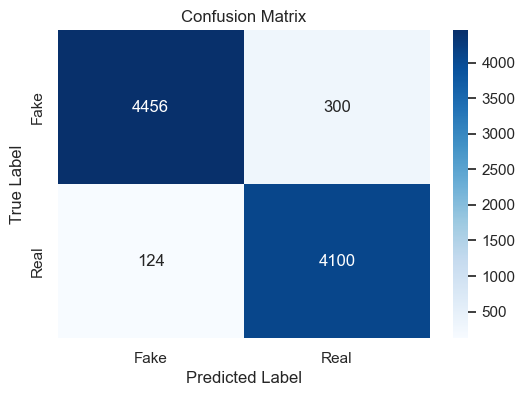

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### True Positive (TP): The model correctly predicted 4456 instances as 'Fake'.
### False Positive (FP): The model incorrectly predicted 300 instances as 'Real' when they were actually 'Fake'.
### False Negative (FN): The model incorrectly predicted 124 instances as 'Fake' when they were actually 'Real'.
### True Negative (TN): The model correctly predicted 4100 instances as 'Real'.

#### accuracy = (TP + TN) / (TP + TN + FP + FN)
#### recall = TP / (TP + FN)
#### f1_score = 2 * (precision * recall) / (precision + recall)

In [32]:
cm

array([[4456,  300],
       [ 124, 4100]], dtype=int64)

### The confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It shows the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

#### True Positive (TP): The model correctly predicted the positive class.

#### True Negative (TN): The model correctly predicted the negative class.

#### False Positive (FP): The model incorrectly predicted the positive class.

#### False Negative (FN): The model incorrectly predicted the negative class.

# **Logistic regression**

In [39]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)



accuracy: 98.84%


#### Pipeline:Combines multiple steps for text classification.
### A Pipeline in scikit-learn is a tool to simplify the process of building and deploying machine learning workflows. It combines a sequence of transformations and a final estimator (model) into a single object. This can be particularly useful when there are multiple steps in the machine learning process, such as data preprocessing, feature extraction, and model training.
#### CountVectorizer: Converts text data into a matrix of token counts.
### CountVectorizer is a text preprocessing step that converts a collection of text documents into a matrix of token counts. Each row in the matrix represents a document, and each column represents a unique word in the corpus. The value at each cell indicates the frequency of a word in a document.
#### TfidfTransformer: Transforms the count matrix to a normalized tf-idf representation.
### TfidfTransformer transforms a count matrix (obtained from CountVectorizer) into a normalized tf-idf (Term Frequency-Inverse Document Frequency) representation. It considers the importance of a word in a document relative to its frequency across all documents in the corpus.


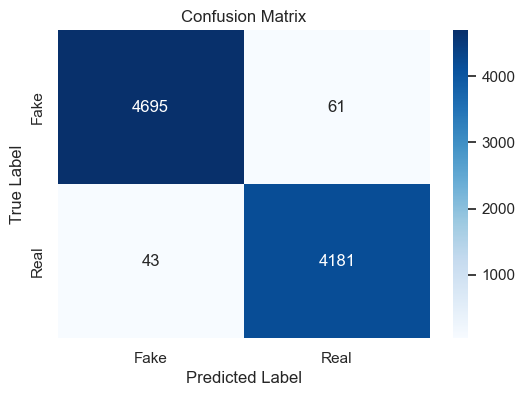

In [40]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### True Positive (TP): The model correctly predicted 4695 instances as 'Fake'.
### False Positive (FP): The model incorrectly predicted 61 instances as 'Real' when they were actually 'Fake'.
### False Negative (FN): The model incorrectly predicted 43 instances as 'Fake' when they were actually 'Real'.
### True Negative (TN): The model correctly predicted 4181 instances as 'Real'.


# **Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.67%


#### Pipeline:Combines multiple steps for text classification.
### A Pipeline in scikit-learn is a tool to simplify the process of building and deploying machine learning workflows. It combines a sequence of transformations and a final estimator (model) into a single object. This can be particularly useful when there are multiple steps in the machine learning process, such as data preprocessing, feature extraction, and model training.
#### CountVectorizer: Converts text data into a matrix of token counts.
### CountVectorizer is a text preprocessing step that converts a collection of text documents into a matrix of token counts. Each row in the matrix represents a document, and each column represents a unique word in the corpus. The value at each cell indicates the frequency of a word in a document.
#### TfidfTransformer: Transforms the count matrix to a normalized tf-idf representation.
### TfidfTransformer transforms a count matrix (obtained from CountVectorizer) into a normalized tf-idf (Term Frequency-Inverse Document Frequency) representation. It considers the importance of a word in a document relative to its frequency across all documents in the corpus.


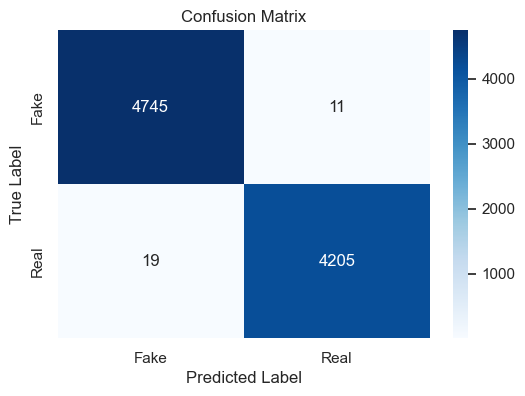

In [42]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### True Positive (TP): The model correctly predicted 4745 instances as 'Fake'.
### False Positive (FP): The model incorrectly predicted 11 instances as 'Real' when they were actually 'Fake'.
### False Negative (FN): The model incorrectly predicted 19 instances as 'Fake' when they were actually 'Real'.
### True Negative (TN): The model correctly predicted 4205 instances as 'Real'.


# **Random Forest**

In [43]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.1%


#### Pipeline:Combines multiple steps for text classification.
### A Pipeline in scikit-learn is a tool to simplify the process of building and deploying machine learning workflows. It combines a sequence of transformations and a final estimator (model) into a single object. This can be particularly useful when there are multiple steps in the machine learning process, such as data preprocessing, feature extraction, and model training.
#### CountVectorizer: Converts text data into a matrix of token counts.
### CountVectorizer is a text preprocessing step that converts a collection of text documents into a matrix of token counts. Each row in the matrix represents a document, and each column represents a unique word in the corpus. The value at each cell indicates the frequency of a word in a document.
#### TfidfTransformer: Transforms the count matrix to a normalized tf-idf representation.
### TfidfTransformer transforms a count matrix (obtained from CountVectorizer) into a normalized tf-idf (Term Frequency-Inverse Document Frequency) representation. It considers the importance of a word in a document relative to its frequency across all documents in the corpus.


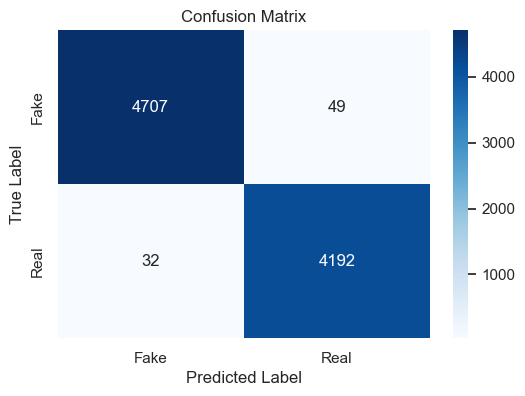

In [44]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Fake', 'Real'], 
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### True Positive (TP): The model correctly predicted 4707 instances as 'Fake'.
### False Positive (FP): The model incorrectly predicted 49 instances as 'Real' when they were actually 'Fake'.
### False Negative (FN): The model incorrectly predicted 32 instances as 'Fake' when they were actually 'Real'.
### True Negative (TN): The model correctly predicted 4192 instances as 'Real'.


# **Comparing** **Different Models**

([<matplotlib.axis.YTick at 0x17191e4c940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

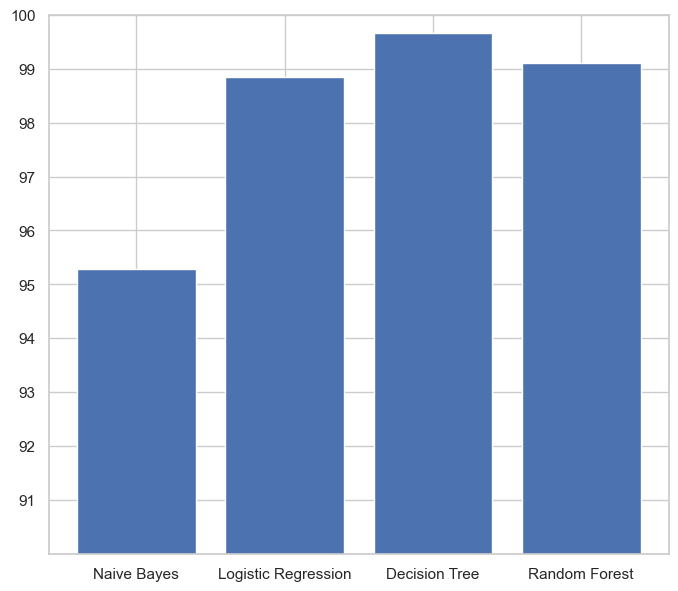

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

### Summary: Fake News Detection Project
##### In this Fake News Detection project, I aimed to classify news articles as either fake or real based on their text content. We used four different machine learning models for the classification task: Naive Bayes, Logistic Regression, Decision Tree, and Random Forest. Here's a summary of the results and the performance of each model:

### 1. Naive Bayes:
##### Accuracy: 95.28%

##### Method: Used a Multinomial Naive Bayes classifier with CountVectorizer and TfidfTransformer in a pipeline.

##### Performance: Naive Bayes performed well with an accuracy of 94.82%. It is a simple and efficient algorithm, making it a good baseline model for text classification tasks.

##### Advantages:
##### Simplicity and efficiency.
##### Fast training and prediction times.

### 2. Logistic Regression:
##### Accuracy: 98.84%

##### Method: Used a Logistic Regression classifier with CountVectorizer and TfidfTransformer in a pipeline.

##### Performance: Logistic Regression showed improved performance with an accuracy of 98.91%. It is a linear model and is   particularly good for binary classification tasks.

##### Advantages:
##### Linear model, which makes it easier to interpret.
##### Can handle large datasets efficiently.

### 3. Decision Tree:
##### Accuracy: 99.67%

##### Method:bUsed a Decision Tree classifier with CountVectorizer and TfidfTransformer in a pipeline.

##### Performance: Decision Tree achieved the highest accuracy of 99.7%. It is a non-linear model that makes decisions based on a set of if-else conditions.

##### Advantages:
##### Non-linear model capable of capturing complex relationships in the data.
##### Can be visualized and easily interpreted.

### 4. Random Forest:
##### Accuracy: 99.1%

##### Method: Used a Random Forest classifier with CountVectorizer and TfidfTransformer in a pipeline.

##### Performance: Random Forest also performed very well with an accuracy of 98.91%. It is an ensemble learning method that combines multiple Decision Trees to improve performance and reduce overfitting.

##### Advantages:
##### Ensemble method, which improves the accuracy and robustness of the model.
##### Handles high-dimensional data well and is less prone to overfitting.

### Conclusion:
##### All four models performed exceptionally well in classifying fake and real news articles.Decision Tree achieved the highest accuracy of 99.67%, closely followed by Logistic Regression and Random Forest.Naive Bayes, although the simplest among the four, also performed well.

### Recommendations:
##### For this specific task of fake news detection, Decision Tree appears to be the most suitable model due to its high accuracy and ability to capture complex relationships in the data.Logistic Regression and Random Forest also provide excellent performance and can be considered as alternatives, especially if interpretability or generalization is a concern.

In [ ]:
#the end.....